In [81]:
from util.clean_data import clean_data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [82]:
# load the data
data = pd.read_csv('data/diamond.csv')

# Define target
y = data['color']

# perform one hot encoding and log transforms for carat and price
df = clean_data(data)

In [83]:
# Check which feature is best for classification problem
def check_class_distribution(df, column_name):
    class_counts = df[column_name].value_counts()
    class_percentages = df[column_name].value_counts(normalize=True) * 100

    print(f"Class distribution for {column_name}:")
    for cls, count in class_counts.items():
        percentage = class_percentages[cls]
        print(f"Class {cls}: {count} ({percentage:.2f}%)")

check_class_distribution(df, 'color')
check_class_distribution(df, 'clarity')

Class distribution for color:
Class 4: 11292 (20.93%)
Class 6: 9797 (18.16%)
Class 5: 9542 (17.69%)
Class 3: 8304 (15.39%)
Class 7: 6775 (12.56%)
Class 2: 5422 (10.05%)
Class 1: 2808 (5.21%)
Class distribution for clarity:
Class 5: 13065 (24.22%)
Class 6: 12258 (22.73%)
Class 4: 9194 (17.04%)
Class 7: 8171 (15.15%)
Class 8: 5066 (9.39%)
Class 9: 3655 (6.78%)
Class 10: 1790 (3.32%)
Class 3: 741 (1.37%)


In [84]:
# Drop the old carat and price columns along with target color
df = df.drop(columns=['carat', 'price', 'color'])

# standardize the data
df = (df - df.mean()) / df.std()
X = df.values
#X.describe()

In [85]:
max_depths = np.arange(2, 20, 1) # Tree depth range

K = 10 # Number of folds
CV = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [86]:
# Error storage variables
Error_train = np.empty((len(max_depths), K))
Error_test = np.empty((len(max_depths), K))

In [88]:
# Cross validation and model training loop
k = 0
for train_index, test_index in CV.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for i, depth in enumerate(max_depths):
        model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        Error_train[i, k] = np.mean(y_train_pred != y_train)
        Error_test[i, k] = np.mean(y_test_pred != y_test)

    k += 1

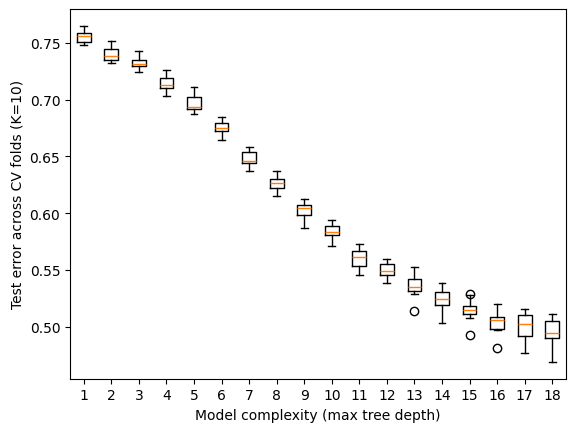

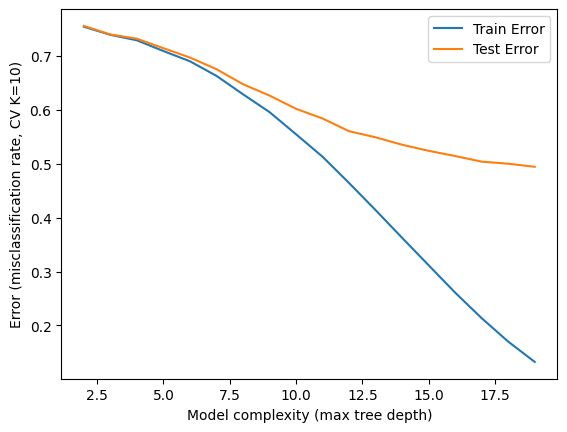

In [89]:
plt.figure()
plt.boxplot(Error_test.T)
plt.xlabel("Model complexity (max tree depth)")
plt.ylabel(f"Test error across CV folds (K={K})")

plt.figure()
plt.plot(max_depths, Error_train.mean(axis=1), label='Train Error')
plt.plot(max_depths, Error_test.mean(axis=1), label='Test Error')
plt.xlabel("Model complexity (max tree depth)")
plt.ylabel(f"Error (misclassification rate, CV K={K})")
plt.legend()

plt.show()